<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

https://towardsdatascience.com/exploring-reddits-ask-me-anything-using-the-praw-api-wrapper-129cf64c5d65

In [25]:
from skimage import io
import json 
import praw

praw.__version__

'6.5.1'

In [90]:
import pandas as pd
import numpy as np

In [26]:
url = 'https://www.reddit.com/'
with open('/Users/chanvarma/projects/thinkful-capstones/sunset-rater/.secret/credentials.json') as f:
    params = json.load(f)

In [27]:
reddit = praw.Reddit(client_id=params['client_id'], 
                     client_secret=params['api_key'],
                     password=params['password'], 
                     user_agent='sunset-rater by u/greyshirtbrownguy',
                     username=params['username'])

In [38]:
subreddit = reddit.subreddit('sunset')
print(subreddit.title, subreddit.subscribers) 

Sunset 23360


In [85]:
def add_thread(thread):
    threads[thread.id] = {'title': thread.title,
                          'score': thread.score,
                          'upvote_ratio': thread.upvote_ratio,
                          'url': thread.url,
                          'num_comments': thread.num_comments,
                          'time_created': thread.created_utc,
                          'edited': thread.edited,
                          'link_flair_text': thread.link_flair_text,
                          'self_text': thread.selftext,
                          'permalink': 'https://reddit.com' + thread.permalink
                          }

In [86]:
threads = dict()

#iterating through the 10,000 submissions marked top, hot and rising. 
#The dictionary will prevent duplicate keys. 

for index, submission in enumerate(subreddit.top(limit = 10000)): 
    add_thread(submission)  
    
    if (index % 200 == 0) & (index > 0):
        print(index, "top entries added.")
        
for index, submission in enumerate(subreddit.rising(limit = 10000)): 
    add_thread(submission)  
    
    if (index % 200 == 0) & (index > 0):
        print(index, "rising entries added.")
        
for index, submission in enumerate(subreddit.hot(limit = 10000)): 
    add_thread(submission)  
    
    if (index % 200 == 0) & (index > 0):
        print(index, "hot entries added.")

200 top entries added.
400 top entries added.
600 top entries added.
800 top entries added.
200 hot entries added.
400 hot entries added.
600 hot entries added.
800 hot entries added.


In [87]:
len(threads)

1850

In [92]:
data = pd.DataFrame.from_dict(threads, orient = 'index')
data.head()

,title,score,upvote_ratio,url,num_comments,time_created,edited,link_flair_text,self_text,permalink
f3ijp9,Sunset after a rainy day,434,1.00,https://i.redd.it/k6egzva4urg41.jpg,17,1.581635e+09,False,None,,https://reddit.com/r/sunset/comments/f3ijp9/su...
e9xj7q,My dad took this departing JFK this evening,390,1.00,https://i.redd.it/gtrbu2my7b441.jpg,8,1.576203e+09,False,[OC],,https://reddit.com/r/sunset/comments/e9xj7q/my...
emrba1,My boyfriend recently passed away and this was...,367,0.99,https://i.redd.it/6o521f50ky941.jpg,9,1.578665e+09,False,None,,https://reddit.com/r/sunset/comments/emrba1/my...
ffxwj5,-,360,0.99,https://i.redd.it/sm8gyn1biol41.jpg,9,1.583774e+09,False,[OC],,https://reddit.com/r/sunset/comments/ffxwj5/_/
fo8ep2,"Kauai sunset, take me back please 😭",359,1.00,https://v.redd.it/j15l7czahno41,8,1.585069e+09,False,None,,https://reddit.com/r/sunset/comments/fo8ep2/ka...


In [99]:
data.to_csv("/Users/chanvarma/projects/thinkful-capstones/sunset-rater/raw_data.csv")

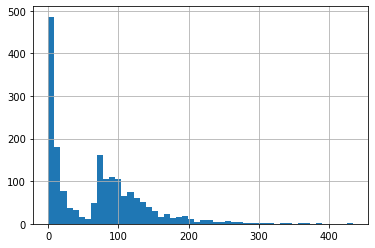

In [102]:
data['score'].hist(bins = 50)

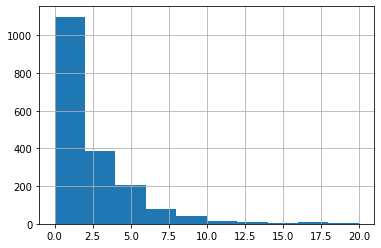

In [110]:
data['num_comments'].hist()